# Lyrical Analysis

## Word Cloud and Sentiment

This notebook contains a Python script that analyzes song lyrics. The analysis is performed in two parts:

1. **Word Cloud Visualization**: The script takes a string of song lyrics and generates a word cloud. This visualization helps understand the frequency of words in the song lyrics. The most frequently occurring words appear larger in the word cloud. In this script, we use the `CountVectorizer` from sklearn to convert text data into a matrix of word counts. We then use the `WordCloud` function from the wordcloud library to generate the visualization.

2. **Sentiment Analysis**: The script also performs sentiment analysis on the song lyrics using the `SentimentIntensityAnalyzer` from the nltk library. Sentiment analysis is the process of determining the emotional tone behind a series of words. It is used to gain an understanding of the attitudes, opinions and emotions expressed within the text.

To use the script, call the function `analyze_lyrics()` with your song lyrics as an argument. The function will display the word cloud and print the sentiment scores.

```python
analyze_lyrics("your song lyrics here")


In [6]:
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from PIL import Image

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jakehclark/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

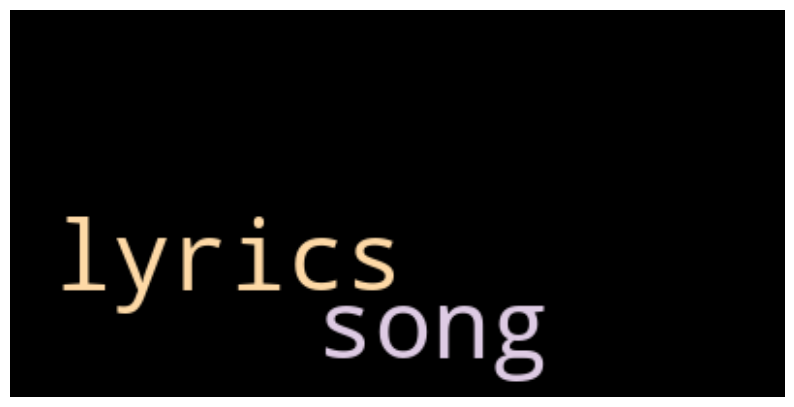

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [7]:
def analyze_lyrics(lyrics):
    """
    This function takes a string of song lyrics, creates a word cloud visualization, 
    and performs sentiment analysis.
    
    Parameters:
    lyrics (str): The song lyrics to analyze.
    """
    
    # Instantiate a CountVectorizer object to transform the text data into a bag-of-words
    vectorizer = CountVectorizer(stop_words='english')

    # Fit and transform the data
    word_count = vectorizer.fit_transform([lyrics])

    # Sum up the counts of each vocabulary word
    word_freq = word_count.sum(axis=0).tolist()[0]

    # Get feature names (words) from vectorizer
    words = vectorizer.get_feature_names_out()

    # Prepare a dictionary with words and their corresponding frequencies
    word_freq_dict = dict(zip(words, word_freq))

    # Generate a word cloud image
    wordcloud = WordCloud(background_color='black', colormap='Pastel1', max_font_size=50, max_words=100).generate_from_frequencies(word_freq_dict)

    # Display the generated image
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

    # Perform sentiment analysis on the text data
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(lyrics)

    # Print the sentiment scores
    print(sentiment)

    
analyze_lyrics("your song lyrics here")

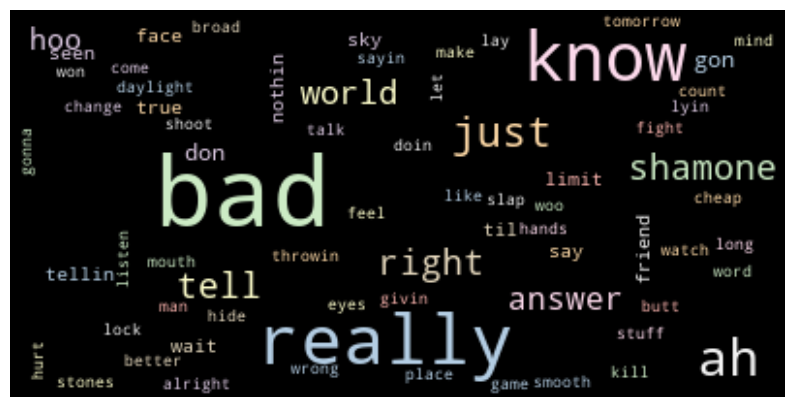

{'neg': 0.292, 'neu': 0.66, 'pos': 0.048, 'compound': -0.9996}


In [8]:
lyrics = '''
Ah, your butt is mine, gon' tell you right, ah
Just show your face in broad daylight, ah
I'm tellin' you on who I feel, ah
Gonna hurt your mind, don't shoot to kill

Shamone, ah, shamone
Lay it on me, ah, alright

Ah, I'm givin' you on count to three, ah
Just show your stuff or let it be, ah
I'm tellin' you, just watch your mouth, ah
I know your game, what you're about

Well, they say the sky's the limit
And to me that's really true, ah
But, my friend, you have seen nothin'
Just wait 'til I get through

Because I'm bad, I'm bad, shamone (bad, bad, really, really bad)
You know I'm bad, I'm bad (bad, bad)
You know it (really, really bad)
You know I'm bad, I'm bad (bad, bad)
Shamone, you know (really, really bad)
And the whole world has to answer right now
Just to tell you once again
Who's bad?

The word is out, you're doin' it wrong, ah
Gon' lock you up before too long, ah
Your lyin' eyes gon' tell you right, ah
So listen up, don't make a fight, ah
Your talk is cheap, you're not a man, ah
You're throwin' stones to hide your hands

Well, they say the sky's the limit
And to me that's really true, ah
But, my friend, you have seen nothin'
Just wait 'til I get through

Because I'm bad, I'm bad, shamone (bad, bad, really, really bad)
You know I'm bad, I'm bad (bad, bad)
You know it (really, really bad)
You know I'm bad, I'm bad (bad, bad)
You know it, you know (really, really bad)
And the whole world has to answer right now
Just to tell you once again
Who's bad?

We can change the world tomorrow
This could be a better place, ah
If you don't like what I'm sayin'
Then won't you slap my face?

Because I'm bad, I'm bad, shamone (bad, bad, really, really bad)
You know I'm bad, I'm bad (bad, bad)
You know it (really, really bad)
You know I'm bad, I'm bad (bad, bad)
You know it, you know (really, really bad)
And the whole world has to answer right now (hoo, hoo)
Just to tell you once again (hoo)

You know I'm bad, I'm bad, shamone (bad, bad, really, really bad)
You know I'm bad, I'm bad (bad, bad)
You know it, you know it (really, really bad)
You know, you know (bad, bad)
You know, shamone (really, really bad)
And the whole world has to answer right now
Just to tell you once again

You know I'm smooth, I'm bad, you know it (bad, bad, really, really bad)
You know I'm bad, I'm bad (bad, bad, really, really bad)
You know, you know, you know it, come on (bad, bad, really, really bad)
And the whole world has to answer right now (hoo)
Just to tell you once again (hoo)

You know I'm bad, I'm bad, you know it (bad, bad, really, really bad)
You know I'm bad, you know, woo (bad, bad, really, really bad)
You know I'm bad, I'm bad (bad, bad)
You know it, you know (really, really bad)
And the whole world has to answer right now
Just to tell you once again
Who's bad?
'''

analyze_lyrics(lyrics)